## 线性回归实例
    ——城市人口（万人）与人均年收益（万美元）的线性关系

### 1.引入包

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 2.导入并编辑数据

In [4]:
# 导入数据，输出前5行
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
print(data[0:5])

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


In [49]:
# numpy.c_[]  将切片对象沿第二个轴（按列）转换为连接
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]
print(y[0:5])

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


### 3.数据可视化

Text(0,0.5,'Profit in $10,000s')

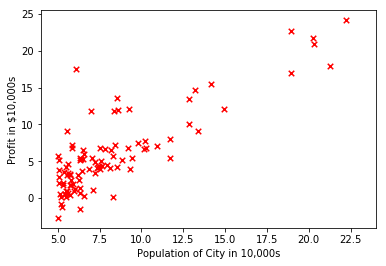

In [14]:
# 绘制散点图，matplotlib.pyplot.scatter()
plt.scatter(X[:, 1], y,s=30, c='r', marker='x', linewidths=1)
# x_min = np.min(X[:, 1])
# x_max = np.max(X[:, 1])
plt.xlim(4,24)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

### 3.损失函数

In [21]:
# 计算损失函数
def costFunction(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    J = 1.0 / (2 * m) * (np.sum(np.square(h-y)))
    
    return J

In [22]:
costFunction(X, y)

32.072733877455676

### 4.梯度下降

In [32]:
# 梯度下降
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1.0 / m) * X.T.dot(h-y)
        J_history[iter] = costFunction(X, y, theta)
    return (theta, J_history)

theta:  [-0.18266474  0.82001085]


Text(0.5,0,'Iterations')

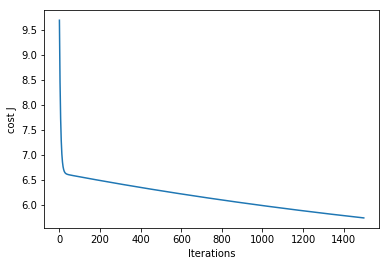

In [45]:
# 绘制损失函数迭代变化
theta, cost_J = gradientDescent(X, y)
print('theta: ', theta.ravel())

plt.plot(cost_J)
plt.ylabel('cost J')
plt.xlabel('Iterations')

### 5.与scikit-learn的线性回归模型对比

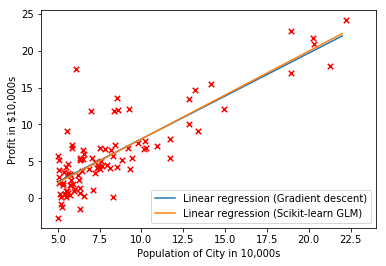

In [37]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# 画出我们自己写的线性回归梯度下降收敛的情况
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# 和Scikit-learn中的线性回归对比一下 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

### 6.预测

In [38]:
# 预测一下人口为35000和70000的城市的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]
